## Classification (c)

In [1]:
from neuralnet import *
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt

config_c = {}
config_c['layer_specs'] = [3072, 64, 64, 10]
config_c['activation'] = 'tanh'
config_c['learning_rate'] = 0.1
config_c['batch_size'] = 256
config_c['epochs'] = 250  
config_c['early_stop'] = True 
config_c['early_stop_epoch'] = 5
config_c['L2_penalty'] = 0  
config_c['momentum'] = True  
config_c['momentum_gamma'] = 0.9  
# Create the model

#TODO
#momentum, early stop , expect accuracy around 37%

In [2]:
"""
Train your model here.
Implement batch SGD to train the model.
Implement Early Stopping.
Use config to set parameters for training like learning rate, momentum, etc.
"""
def train_e(model, x_train, y_train, x_valid, y_valid, config, patience=5):
    epochs = config_c['epochs']
    batch_size = config['batch_size']
    momentum =    config['momentum']
    momentum_gamma = config['momentum_gamma']
    L2_penalty = config['momentum_gamma']
    patience = config['early_stop_epoch']

    train_loss_record = []
    train_accuracy_record = []
    holdout_loss_record = []
    holdout_accuracy_record = []

    # How many times the validation loss has gone up in a row.
    cur_loss_up_sequence = 0

    for epoch in range(epochs):
        #model.zero_grad()
        batch_loss = []
        batch_accuracy = []
        for x, y in generate_minibatches(x_train, y_train, batch_size):
            # Forward Pass
            train_y,loss = model.forward(x, y)
            batch_loss.append(loss) 
            # Backward Pass
            model.backward()
            model.updateweight(momentum = True) # update weight for each layer.
            batch_accuracy.append(model.accuracy(x,y))
    
        train_loss = np.mean(np.array(batch_loss))
        train_accuracy = np.mean(np.array(batch_accuracy))
        
        holdout_loss = model.forward(x_valid, y_valid)[1]
        holdout_accuracy = model.accuracy(x_valid, y_valid)

        train_loss_record.append(train_loss)
        train_accuracy_record.append(train_accuracy)

        holdout_loss_record.append(holdout_loss)
        holdout_accuracy_record.append(holdout_accuracy)

        print(f' epoch: {epoch + 1}, train accuracy: {train_accuracy:.4f}, train_loss_norm:{train_loss:.4f}, '\
            f'valid_acc: {holdout_accuracy:.4f}, valid_loss_norm: {holdout_loss:.4f}')   


        # Save the best weights according to test set.
        if holdout_loss > max(holdout_loss_record):
            cur_loss_up_sequence += 1

            if cur_loss_up_sequence >= patience:
                model.save_load_weight(save=False)
                print("earlystop")
                break
        else:
            cur_loss_up_sequence = 0
            # Save the best weights.
            model.save_load_weight(save=True)
    
    return train_loss_record, train_accuracy_record, holdout_loss_record, holdout_accuracy_record

model_c  = Neuralnetwork(config_c)

# Load the data
x_train, y_train, stats = load_data(path="./data",stats = None, mode="train")
x_test, y_test = load_data(path="./data",stats = stats, mode="test")

x_train, y_train, x_valid, y_valid = split_data(x_train,y_train)

train_loss_record, train_accuracy_record, holdout_loss_record, holdout_accuracy_record = train_e(model_c,x_train,y_train,x_valid,y_valid,config_c)

# Recall parameters with minimum validation loss
model_c.save_load_weight(save=False)
test_accuracy = test(model_c, x_test, y_test) 
print(test_accuracy)


(50000, 32, 32, 3)
inp: (50000, 32, 32, 3)
 epoch: 1, train accuracy: 0.2015, train_loss_norm:5.7791, valid_acc: 0.1916, valid_loss_norm: 3.8628
 epoch: 2, train accuracy: 0.1733, train_loss_norm:2.1484, valid_acc: 0.2478, valid_loss_norm: 2.0162
 epoch: 3, train accuracy: 0.3267, train_loss_norm:1.8888, valid_acc: 0.3404, valid_loss_norm: 1.8437
 epoch: 4, train accuracy: 0.3825, train_loss_norm:1.7735, valid_acc: 0.3620, valid_loss_norm: 1.7758
 epoch: 5, train accuracy: 0.4222, train_loss_norm:1.7010, valid_acc: 0.3760, valid_loss_norm: 1.7466
 epoch: 6, train accuracy: 0.4544, train_loss_norm:1.6410, valid_acc: 0.4080, valid_loss_norm: 1.6898
 epoch: 7, train accuracy: 0.4804, train_loss_norm:1.5881, valid_acc: 0.4174, valid_loss_norm: 1.6802
 epoch: 8, train accuracy: 0.4969, train_loss_norm:1.5531, valid_acc: 0.4308, valid_loss_norm: 1.6500
 epoch: 9, train accuracy: 0.5096, train_loss_norm:1.5236, valid_acc: 0.4336, valid_loss_norm: 1.6501
 epoch: 10, train accuracy: 0.5246, tra

 epoch: 81, train accuracy: 0.8136, train_loss_norm:0.7593, valid_acc: 0.4198, valid_loss_norm: 2.2783
 epoch: 82, train accuracy: 0.8168, train_loss_norm:0.7478, valid_acc: 0.4198, valid_loss_norm: 2.2796
 epoch: 83, train accuracy: 0.8168, train_loss_norm:0.7516, valid_acc: 0.4114, valid_loss_norm: 2.3814
 epoch: 84, train accuracy: 0.8197, train_loss_norm:0.7443, valid_acc: 0.4190, valid_loss_norm: 2.2996
 epoch: 85, train accuracy: 0.8218, train_loss_norm:0.7337, valid_acc: 0.4212, valid_loss_norm: 2.3342
 epoch: 86, train accuracy: 0.8236, train_loss_norm:0.7334, valid_acc: 0.4198, valid_loss_norm: 2.3460
 epoch: 87, train accuracy: 0.8238, train_loss_norm:0.7270, valid_acc: 0.4154, valid_loss_norm: 2.3445
 epoch: 88, train accuracy: 0.8257, train_loss_norm:0.7274, valid_acc: 0.4222, valid_loss_norm: 2.3780
 epoch: 89, train accuracy: 0.8246, train_loss_norm:0.7300, valid_acc: 0.4160, valid_loss_norm: 2.3453
 epoch: 90, train accuracy: 0.8289, train_loss_norm:0.7156, valid_acc: 0.

 epoch: 160, train accuracy: 0.8922, train_loss_norm:0.5134, valid_acc: 0.3956, valid_loss_norm: 3.0829
 epoch: 161, train accuracy: 0.8916, train_loss_norm:0.5134, valid_acc: 0.4000, valid_loss_norm: 3.0332
 epoch: 162, train accuracy: 0.8909, train_loss_norm:0.5187, valid_acc: 0.4042, valid_loss_norm: 3.0738
 epoch: 163, train accuracy: 0.8905, train_loss_norm:0.5296, valid_acc: 0.4056, valid_loss_norm: 3.0304
 epoch: 164, train accuracy: 0.8942, train_loss_norm:0.5128, valid_acc: 0.4046, valid_loss_norm: 3.0273
 epoch: 165, train accuracy: 0.8967, train_loss_norm:0.5008, valid_acc: 0.3994, valid_loss_norm: 3.0759
 epoch: 166, train accuracy: 0.8944, train_loss_norm:0.5049, valid_acc: 0.4000, valid_loss_norm: 3.0487
 epoch: 167, train accuracy: 0.8948, train_loss_norm:0.5004, valid_acc: 0.4038, valid_loss_norm: 3.0710
 epoch: 168, train accuracy: 0.8978, train_loss_norm:0.4923, valid_acc: 0.3900, valid_loss_norm: 3.1253
 epoch: 169, train accuracy: 0.8990, train_loss_norm:0.4843, val

 epoch: 239, train accuracy: 0.9216, train_loss_norm:0.4060, valid_acc: 0.3940, valid_loss_norm: 3.6236
 epoch: 240, train accuracy: 0.9253, train_loss_norm:0.3910, valid_acc: 0.3900, valid_loss_norm: 3.6198
 epoch: 241, train accuracy: 0.9296, train_loss_norm:0.3725, valid_acc: 0.3980, valid_loss_norm: 3.6087
 epoch: 242, train accuracy: 0.9298, train_loss_norm:0.3695, valid_acc: 0.3966, valid_loss_norm: 3.6195
 epoch: 243, train accuracy: 0.9250, train_loss_norm:0.3917, valid_acc: 0.3976, valid_loss_norm: 3.6049
 epoch: 244, train accuracy: 0.9242, train_loss_norm:0.4008, valid_acc: 0.3956, valid_loss_norm: 3.6220
 epoch: 245, train accuracy: 0.9255, train_loss_norm:0.3943, valid_acc: 0.3926, valid_loss_norm: 3.6600
 epoch: 246, train accuracy: 0.9239, train_loss_norm:0.3990, valid_acc: 0.3972, valid_loss_norm: 3.6466
 epoch: 247, train accuracy: 0.9277, train_loss_norm:0.3898, valid_acc: 0.3956, valid_loss_norm: 3.6172
 epoch: 248, train accuracy: 0.9251, train_loss_norm:0.3973, val

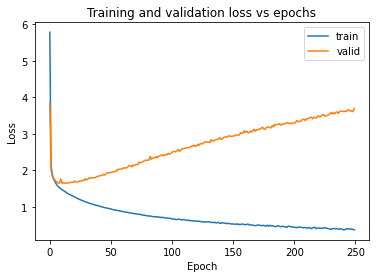

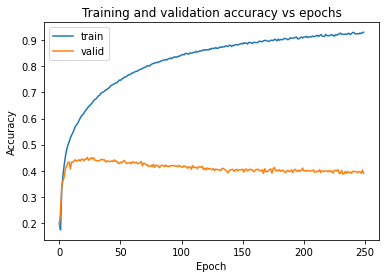

In [4]:


plt.figure(1)
plt.plot(np.arange(config_c['epochs']), train_loss_record, label='train')
plt.plot(np.arange(config_c['epochs']), holdout_loss_record, label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss vs epochs')
plt.legend()
plt.show()


plt.figure(2)
plt.plot(np.arange(config_c['epochs']), train_accuracy_record, label='train')
plt.plot(np.arange(config_c['epochs']), holdout_accuracy_record, label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs epochs')
plt.legend()
plt.show()